<a href="https://colab.research.google.com/github/saeed-hmt/Machine-Learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

### Import data and data analysis

In [2]:
file_path = input('Enter csv file path : ')
data = pd.read_csv(file_path)
data

Enter csv file path : /content/cardata.csv


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# data.drop(columns='Car_Name', inplace=True)
# data

In [4]:
data['Age'] = data['Year'].max() + 1 - data['Year']

In [5]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,5.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,1.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,3.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,5.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,7.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,16.000000


In [7]:
data_strings = data[['Fuel_Type', 'Seller_Type', 'Transmission']]
data_strings

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [8]:
data_strings.describe()

,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


In [9]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

**As we can see above, dataset has no missing values.**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Age            301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


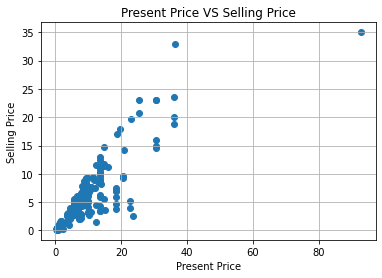

In [11]:
plt.scatter(data['Present_Price'], data['Selling_Price'])
plt.grid()
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Present Price VS Selling Price')
plt.show()

In [12]:
np.corrcoef(data['Present_Price'], data['Selling_Price'])

array([[1.        , 0.87898255],
       [0.87898255, 1.        ]])

In [13]:
# Suspicious Data
data.loc[(data['Present_Price'] > 80) & (data['Selling_Price'] > 32)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,9


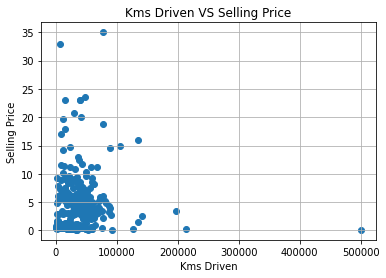

In [14]:
plt.scatter(data['Kms_Driven'], data['Selling_Price'])
plt.grid()
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.title('Kms Driven VS Selling Price')
plt.show()

In [15]:
np.corrcoef(data['Kms_Driven'], data['Selling_Price'])

array([[1.        , 0.02918709],
       [0.02918709, 1.        ]])

In [16]:
# Suspicious Data
data.loc[(data['Kms_Driven'] > 450000) & (data['Selling_Price'] < 5)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,11


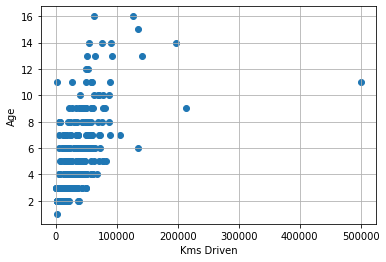

In [17]:
plt.scatter(data['Kms_Driven'], data['Age'])
plt.grid()
plt.xlabel('Kms Driven')
plt.ylabel('Age')
plt.show()

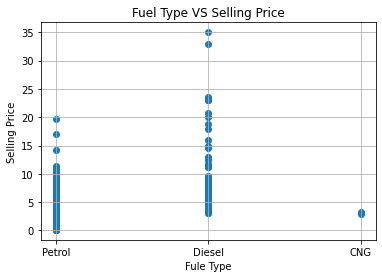

In [18]:
plt.scatter(data['Fuel_Type'], data['Selling_Price'])
plt.xlabel('Fule Type')
plt.ylabel('Selling Price')
plt.title('Fuel Type VS Selling Price')
plt.grid()
plt.show()

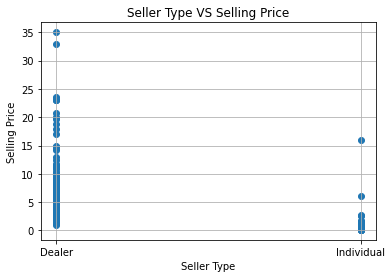

In [19]:
plt.scatter(data['Seller_Type'], data['Selling_Price'])
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Seller Type VS Selling Price')
plt.grid()
plt.show()

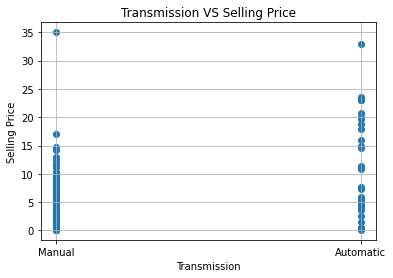

In [20]:
plt.scatter(data['Transmission'], data['Selling_Price'])
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.grid()
plt.title('Transmission VS Selling Price')
plt.show()

In [21]:
data.loc[(data['Transmission'] == 'Manual') & (data['Selling_Price'] > 30)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,9


In [22]:
data.loc[(data['Transmission'] == 'Automatic') & (data['Selling_Price'] > 30)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,2


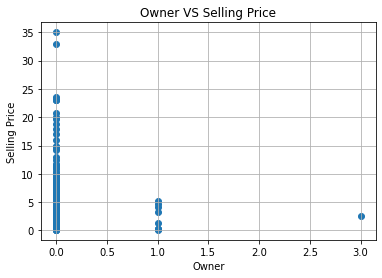

In [23]:
plt.scatter(data['Owner'], data['Selling_Price'])
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.title('Owner VS Selling Price')
plt.grid()
plt.show()

In [24]:
np.corrcoef(data['Owner'], data['Selling_Price'])

array([[ 1.       , -0.0883441],
       [-0.0883441,  1.       ]])

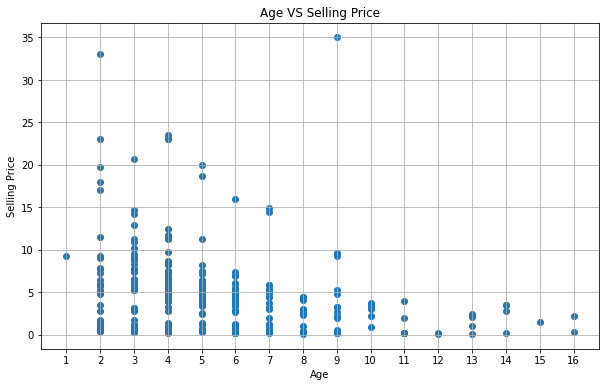

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Selling_Price'])
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.title('Age VS Selling Price')
plt.xticks(np.arange(np.min(data['Age']), np.max(data['Age']) + 1, step=1))
plt.grid()
plt.show()

In [26]:
np.corrcoef(data['Age'], data['Selling_Price'])

array([[ 1.        , -0.23614098],
       [-0.23614098,  1.        ]])

### Linear Regression

In [27]:
x = data[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age']]
y = data['Selling_Price'].values.reshape(-1, 1)

In [28]:
encoders = {}
str_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
for col in str_columns:
    encoders[col] = {}
    for index, name in enumerate(data[col].unique()):
        encoders[col][name] = index + 2
encoders

{'Fuel_Type': {'Petrol': 2, 'Diesel': 3, 'CNG': 4},
 'Seller_Type': {'Dealer': 2, 'Individual': 3},
 'Transmission': {'Manual': 2, 'Automatic': 3}}

In [29]:
encoded_x = x.replace(encoders)
encoded_x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,2,2,0,5
1,9.54,43000,3,2,2,0,6
2,9.85,6900,2,2,2,0,2
3,4.15,5200,2,2,2,0,8
4,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...
296,11.60,33988,3,2,2,0,3
297,5.90,60000,2,2,2,0,4
298,11.00,87934,2,2,2,0,10
299,12.50,9000,3,2,2,0,2


In [30]:
encoded_x.describe()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,7.628472,36947.205980,2.212625,2.352159,2.132890,0.043189,5.372093
std,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000,1.000000
25%,1.200000,15000.000000,2.000000,2.000000,2.000000,0.000000,3.000000
50%,6.400000,32000.000000,2.000000,2.000000,2.000000,0.000000,5.000000
75%,9.900000,48767.000000,2.000000,3.000000,2.000000,0.000000,7.000000
max,92.600000,500000.000000,4.000000,3.000000,3.000000,3.000000,16.000000


In [31]:
norm_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_x = norm_scale.fit_transform(encoded_x)
# normalized_x = normalizer.transform(encoded_x)
pd.DataFrame(normalized_x,
             columns=['Present_Price', 'Kms_Driven', 'Owner',
                      'Age', 'Seller_Type', 'Fuel_Type', 'Transmission'])

,Present_Price,Kms_Driven,Owner,Age,Seller_Type,Fuel_Type,Transmission
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667
...,...,...,...,...,...,...,...
296,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333
297,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000
298,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000
299,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667


In [32]:
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=1)

In [33]:
reg = LinearRegression()

In [34]:
reg.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = reg.predict(x_test)

In [36]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)
print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R2_Score = {r2_score}')

Mean Absolute Error = 1.153004591615893
Mean Squared Error = 3.2876460857158794
Root Mean Squared Error = 1.8131867211392982
R2_Score = 0.848454941209036


In [37]:
print(f'coefficients : {reg.coef_}')
print(f'intercept : {reg.intercept_}')

coefficients : [[40.78660491 -2.4117621   3.09666449 -1.20366204  1.86575915  1.16153484
  -6.35110467]]
intercept : [3.33895976]


In [38]:
cv_model = LinearRegression()
kfold = KFold(n_splits=5)
cv_scores = cross_val_score(cv_model, normalized_x, y, cv=kfold)
print(cv_scores)
print(f'mean cross validation scores : {np.mean(cv_scores)}')

[  0.83482494   0.77512003 -94.61105213   0.61088628   0.83892197]
mean cross validation scores : -18.31025978321818


### Combine Features

#### Presnet Price ** 2

In [39]:
x_present_price_2 = x.copy()
x_present_price_2['Present Price ** 2'] = x_present_price_2['Present_Price'] ** 2
x_present_price_2

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Present Price ** 2
0,5.59,27000,Petrol,Dealer,Manual,0,5,31.2481
1,9.54,43000,Diesel,Dealer,Manual,0,6,91.0116
2,9.85,6900,Petrol,Dealer,Manual,0,2,97.0225
3,4.15,5200,Petrol,Dealer,Manual,0,8,17.2225
4,6.87,42450,Diesel,Dealer,Manual,0,5,47.1969
...,...,...,...,...,...,...,...,...
296,11.60,33988,Diesel,Dealer,Manual,0,3,134.5600
297,5.90,60000,Petrol,Dealer,Manual,0,4,34.8100
298,11.00,87934,Petrol,Dealer,Manual,0,10,121.0000
299,12.50,9000,Diesel,Dealer,Manual,0,2,156.2500


In [40]:
encoded_x_present_price_2 = x_present_price_2.replace(encoders)
encoded_x_present_price_2

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Present Price ** 2
0,5.59,27000,2,2,2,0,5,31.2481
1,9.54,43000,3,2,2,0,6,91.0116
2,9.85,6900,2,2,2,0,2,97.0225
3,4.15,5200,2,2,2,0,8,17.2225
4,6.87,42450,3,2,2,0,5,47.1969
...,...,...,...,...,...,...,...,...
296,11.60,33988,3,2,2,0,3,134.5600
297,5.90,60000,2,2,2,0,4,34.8100
298,11.00,87934,2,2,2,0,10,121.0000
299,12.50,9000,3,2,2,0,2,156.2500


In [41]:
norm_scale_present_price_2 = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_encoded_x_present_price_2 = norm_scale_present_price_2.fit_transform(encoded_x_present_price_2)
# normalized_x = normalizer.transform(encoded_x)
pd.DataFrame(normalized_encoded_x_present_price_2,
             columns=['Present_Price', 'Kms_Driven', 'Owner',
                      'Age', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Present Price ** 2'])

,Present_Price,Kms_Driven,Owner,Age,Seller_Type,Fuel_Type,Transmission,Present Price ** 2
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,0.003632
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,0.010602
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,0.011303
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,0.001997
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,0.005492
...,...,...,...,...,...,...,...,...
296,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333,0.015681
297,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,0.004048
298,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,0.014099
299,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,0.018210


In [42]:
x_train, x_test, y_train, y_test = train_test_split(normalized_encoded_x_present_price_2, y, test_size=0.2, random_state=1)

In [43]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)
print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R2_Score = {r2_score}')

Mean Absolute Error = 1.1165087878189337
Mean Squared Error = 3.702701229097569
Root Mean Squared Error = 1.9242404291297823
R2_Score = 0.8293228465536668


#### Present Price * KMS Driven

In [44]:
x_pp_kmsd = x.copy()
x_pp_kmsd['Present Price * KMS Driven'] = x['Present_Price'] * x['Kms_Driven']
x_pp_kmsd

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Present Price * KMS Driven
0,5.59,27000,Petrol,Dealer,Manual,0,5,150930.0
1,9.54,43000,Diesel,Dealer,Manual,0,6,410220.0
2,9.85,6900,Petrol,Dealer,Manual,0,2,67965.0
3,4.15,5200,Petrol,Dealer,Manual,0,8,21580.0
4,6.87,42450,Diesel,Dealer,Manual,0,5,291631.5
...,...,...,...,...,...,...,...,...
296,11.60,33988,Diesel,Dealer,Manual,0,3,394260.8
297,5.90,60000,Petrol,Dealer,Manual,0,4,354000.0
298,11.00,87934,Petrol,Dealer,Manual,0,10,967274.0
299,12.50,9000,Diesel,Dealer,Manual,0,2,112500.0


In [45]:
encoded_x_pp_kmsd = x_pp_kmsd.replace(encoders)
encoded_x_pp_kmsd

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Present Price * KMS Driven
0,5.59,27000,2,2,2,0,5,150930.0
1,9.54,43000,3,2,2,0,6,410220.0
2,9.85,6900,2,2,2,0,2,67965.0
3,4.15,5200,2,2,2,0,8,21580.0
4,6.87,42450,3,2,2,0,5,291631.5
...,...,...,...,...,...,...,...,...
296,11.60,33988,3,2,2,0,3,394260.8
297,5.90,60000,2,2,2,0,4,354000.0
298,11.00,87934,2,2,2,0,10,967274.0
299,12.50,9000,3,2,2,0,2,112500.0


In [46]:
norm_scale_x_pp_kmsd = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_encoded_x_pp_kmsd = norm_scale_x_pp_kmsd.fit_transform(encoded_x_pp_kmsd)
pd.DataFrame(normalized_encoded_x_pp_kmsd,
             columns=['Present_Price', 'Kms_Driven', 'Owner',
                      'Age', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Present Price * KMS Driven'])

,Present_Price,Kms_Driven,Owner,Age,Seller_Type,Fuel_Type,Transmission,Present Price * KMS Driven
0,0.057109,0.053053,0.0,0.0,0.0,0.0,0.266667,0.020860
1,0.099913,0.085085,0.5,0.0,0.0,0.0,0.333333,0.056760
2,0.103273,0.012813,0.0,0.0,0.0,0.0,0.066667,0.009373
3,0.041504,0.009409,0.0,0.0,0.0,0.0,0.466667,0.002950
4,0.070980,0.083984,0.5,0.0,0.0,0.0,0.266667,0.040341
...,...,...,...,...,...,...,...,...
296,0.122237,0.067043,0.5,0.0,0.0,0.0,0.133333,0.054550
297,0.060468,0.119119,0.0,0.0,0.0,0.0,0.200000,0.048976
298,0.115735,0.175043,0.0,0.0,0.0,0.0,0.600000,0.133887
299,0.131990,0.017017,0.5,0.0,0.0,0.0,0.066667,0.015539


In [47]:
x_train, x_test, y_train, y_test = train_test_split(normalized_encoded_x_pp_kmsd, y, test_size=0.2, random_state=1)

In [48]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)
print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R2_Score = {r2_score}')

Mean Absolute Error = 0.852338908916499
Mean Squared Error = 1.5755302858012288
Root Mean Squared Error = 1.2552012929411875
R2_Score = 0.9273754462726176


#### Drop Suspicious Data

Index 86 and 196 are suspicious. Dropping these indexes and testing Linear Regression.

In [49]:
dropped_data = data.drop(index=[86, 196])

In [50]:
dropped_data['Present Price * KMS Driven'] = dropped_data['Present_Price'] * dropped_data['Kms_Driven']

In [51]:
x_dropped = dropped_data[['Present_Price', 'Kms_Driven', 'Fuel_Type',
                  'Seller_Type', 'Transmission', 'Owner', 'Age',
                  'Present Price * KMS Driven']]
y_dropped = dropped_data['Selling_Price'].values.reshape(-1, 1)

In [52]:
encoded_x_dropped = x_dropped.replace(encoders)
encoded_x_dropped

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Present Price * KMS Driven
0,5.59,27000,2,2,2,0,5,150930.0
1,9.54,43000,3,2,2,0,6,410220.0
2,9.85,6900,2,2,2,0,2,67965.0
3,4.15,5200,2,2,2,0,8,21580.0
4,6.87,42450,3,2,2,0,5,291631.5
...,...,...,...,...,...,...,...,...
296,11.60,33988,3,2,2,0,3,394260.8
297,5.90,60000,2,2,2,0,4,354000.0
298,11.00,87934,2,2,2,0,10,967274.0
299,12.50,9000,3,2,2,0,2,112500.0


In [53]:
norm_scale_x_dropped = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_encoded_x_dropped = norm_scale_x_dropped.fit_transform(encoded_x_dropped)
pd.DataFrame(normalized_encoded_x_dropped,
             columns=['Present_Price', 'Kms_Driven', 'Owner',
                      'Age', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Present Price * KMS Driven'])

,Present_Price,Kms_Driven,Owner,Age,Seller_Type,Fuel_Type,Transmission,Present Price * KMS Driven
0,0.146756,0.124706,0.0,0.0,0.0,0.0,0.266667,0.036461
1,0.256753,0.200000,0.5,0.0,0.0,0.0,0.333333,0.099212
2,0.265386,0.030118,0.0,0.0,0.0,0.0,0.066667,0.016383
3,0.106656,0.022118,0.0,0.0,0.0,0.0,0.466667,0.005157
4,0.182400,0.197412,0.5,0.0,0.0,0.0,0.266667,0.070512
...,...,...,...,...,...,...,...,...
294,0.314119,0.157591,0.5,0.0,0.0,0.0,0.133333,0.095349
295,0.155388,0.280000,0.0,0.0,0.0,0.0,0.200000,0.085606
296,0.297410,0.411454,0.0,0.0,0.0,0.0,0.600000,0.234024
297,0.339181,0.040000,0.5,0.0,0.0,0.0,0.066667,0.027161


In [54]:
x_train, x_test, y_train, y_test = train_test_split(normalized_encoded_x_dropped,
                                                    y_dropped,
                                                    test_size=0.2,
                                                    random_state=1)

In [55]:
reg_dropped = LinearRegression()
reg_dropped.fit(x_train, y_train)
y_pred = reg_dropped.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)
print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R2_Score = {r2_score}')

Mean Absolute Error = 1.024919539081452
Mean Squared Error = 2.122907777510027
Root Mean Squared Error = 1.4570201705913433
R2_Score = 0.9121827392654015


***Regression model without dropping suspicious data is better.***